# **Progresso da Vacinação contra a COVID-19**

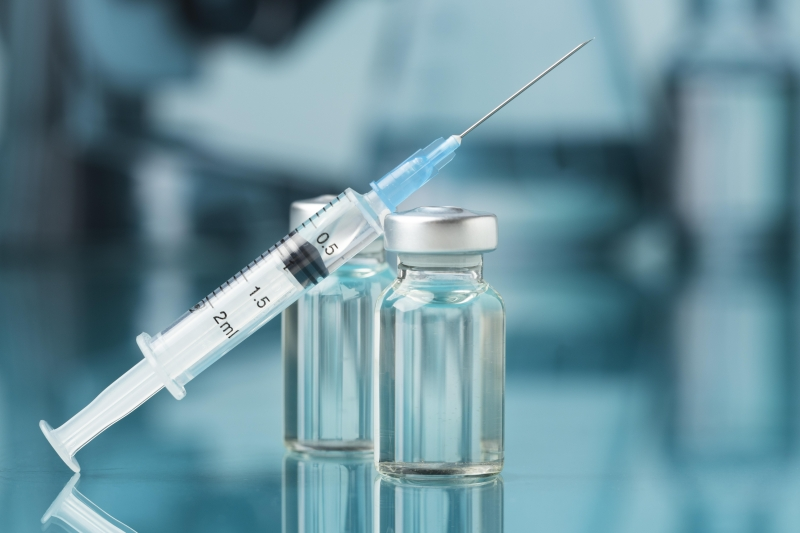

# Introdução

Os dados contêm as seguintes informações:

- **País**: país para o qual as informações de vacinação são fornecidas;
- **Código ISO do País**: código ISO para o país;
- **Data**: data para a entrada dos dados; para algumas das datas temos apenas as vacinações diárias, para outras, apenas o total (cumulativo);
- **Número total de vacinações**: número absoluto de imunizações no país;
- **Número total de pessoas vacinadas**: uma pessoa, dependendo do esquema de imunização, pode receber uma ou mais (normalmente 2) vacinas; em um determinado momento, o número de vacinações pode ser maior do que o número de pessoas;
- **Número total de pessoas totalmente vacinadas**: número de pessoas que receberam o conjunto completo de imunização de acordo com o esquema de imunização (normalmente 2); em um certo momento, pode haver um número de pessoas que recebeu uma vacina e outro número (menor) de pessoas que recebeu todas as vacinas no esquema;
- **Vacinações diárias (brutas)**: para uma determinada entrada de dados, o número de vacinações para aquela data/país;
- **Vacinações diárias**: para uma determinada entrada de dados, o número de vacinações para aquela data/país;
- **Total de vacinações por cem**: razão (em porcentagem) entre o número de vacinações e a população total até a data no país;
- **Número total de pessoas vacinadas por cem**: razão (em porcentagem) entre a população imunizada e a população total até a data no país;
- **Número total de pessoas totalmente vacinadas por cem**: razão (em porcentagem) entre a população totalmente imunizada e a população total até a data no país;
- **Número de vacinações por dia**: número de vacinações diárias para aquele dia e país;
- **Vacinações diárias por milhão**: razão (em ppm) entre o número de vacinações e a população total para a data atual no país;
- **Vacinas usadas no país**: número total de vacinas usadas no país (atualmente);
- **Nome da fonte**: fonte das informações (autoridade nacional, organização internacional, organização local, etc.);
- **Site da fonte**: site da fonte das informações.

## Conteúdo

- **Preparação da análise**
- **Quais vacinas são usadas em cada país?**
- **Qual esquema de vacinação é mais utilizado?**
- **Quantas pessoas foram vacinadas (total e como percentual da população)?**
- **Como a vacinação progrediu**

**Última atualização**






In [83]:
from datetime import datetime

# Data da última atualização
data_ultima_atualizacao_dados = datetime(2021, 6, 22)
data_ultima_atualizacao_notebook = datetime(2021, 6, 22)

# Formatação das datas para string
str_ultima_atualizacao_dados = data_ultima_atualizacao_dados.strftime('%d/%m/%Y')
str_ultima_atualizacao_notebook = data_ultima_atualizacao_notebook.strftime('%d/%m/%Y')

# Exibindo as informações
print(f'Conjunto de dados atualizado pela última vez: {str_ultima_atualizacao_dados}')
print(f'Nota do caderno atualizada pela última vez: {str_ultima_atualizacao_notebook}')


Conjunto de dados atualizado pela última vez: 22/06/2021
Nota do caderno atualizada pela última vez: 22/06/2021


# Preparação da Análise

Inicializamos os pacotes Python que utilizaremos para ingestão, preparação e visualização dos dados. Usaremos principalmente o Plotly para visualização. Em seguida, lemos o arquivo de dados e agregamos as informações com base em alguns campos (país, código ISO e vacinas - que é o esquema de vacinação utilizado em um determinado país).

Nos concentraremos principalmente em:

- **Quais esquemas de vacinação são utilizados em vários países:**
- **Número total de vacinações e percentual de vacinações:**
- **Vacinações diárias e vacinações diárias por milhão:**
- **Número total de pessoas vacinadas e percentual de pessoas vacinadas:**

O dataset também contém informações sobre o número total de pessoas completamente vacinadas (e o percentual delas).

Visualizaremos os valores mais recentes (máximos) e também a variação ao longo do tempo dos valores mencionados acima.

## Inicialização dos Pacotes

Primeiro, importamos os pacotes Python necessários.

```python
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


In [84]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")
import nbformat

Chamando o arquivo **CSV**

In [85]:
data_df = pd.read_csv("country_vaccinations.csv")

Seleciona so as colunas desejadas

In [91]:
country_vaccine = data_df.groupby(['country', 'iso_code', 'vaccines'])[['total_vaccinations', 
                                                                       'total_vaccinations_per_hundred',
                                                                      'daily_vaccinations',
                                                                      'daily_vaccinations_per_million',
                                                                      'people_vaccinated',
                                                                      'people_vaccinated_per_hundred',
                                                                       'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred'
]].max().reset_index()

country_vaccine.columns = ['Country', 'iso_code', 'Vaccines', 'Total vaccinations', 'Percent', 'Daily vaccinations', 
                           'Daily vaccinations per million', 'People vaccinated', 'People vaccinated per hundred',
                           'People fully vaccinated', 'People fully vaccinated percent']

---

## ***Quais vacinas são usadas em cada País?***

Pressione o botão **"Output"** para ver uma lista de países onde cada vacina é utilizada.


In [95]:
vaccines = country_vaccine.Vaccines.unique()
for v in vaccines:
    countries = country_vaccine.loc[country_vaccine.Vaccines==v, 'Country'].values
    print(f"Vaccines: {v}: \nCountries: {list(countries)}\n")
    

Vaccines: BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech: 
Countries: ['Afghanistan']

Vaccines: Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V: 
Countries: ['Albania', 'Bosnia and Herzegovina', 'Philippines', 'Tunisia']

Vaccines: Oxford/AstraZeneca, Sputnik V: 
Countries: ['Algeria', 'Ghana', 'Guyana', 'Kenya', 'Nicaragua']

Vaccines: Oxford/AstraZeneca, Pfizer/BioNTech: 
Countries: ['Andorra', 'Australia', 'Cape Verde', 'Cayman Islands', 'Costa Rica', 'Isle of Man', 'Oman', 'Panama', 'Saudi Arabia', 'Slovenia', 'Sweden']

Vaccines: Oxford/AstraZeneca: 
Countries: ['Angola', 'Anguilla', 'Antigua and Barbuda', 'Bahamas', 'Bangladesh', 'Barbados', 'Bhutan', 'Botswana', 'British Virgin Islands', 'Burkina Faso', 'Cook Islands', "Cote d'Ivoire", 'Democratic Republic of Congo', 'Dominica', 'Eswatini', 'Ethiopia', 'Falkland Islands', 'Fiji', 'French Polynesia', 'Georgia', 'Grenada', 'Jamaica', 'Kosovo', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Montserrat', 'Myanmar',

In [98]:
# Obtém uma lista única de esquemas de vacinação
vaccines = country_vaccine['Vaccines'].unique()

# Itera sobre cada esquema de vacinação
for v in vaccines:
    # Filtra os países que utilizam o esquema de vacinação atual
    countries = country_vaccine.loc[country_vaccine['Vaccines'] == v, 'Country'].values
    # Imprime o esquema de vacinação e a lista de países correspondentes
    print(f"Vacina: {v}\nPaíses: {', '.join(countries)}\n")



Vacina: BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech
Países: Afghanistan

Vacina: Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V
Países: Albania, Bosnia and Herzegovina, Philippines, Tunisia

Vacina: Oxford/AstraZeneca, Sputnik V
Países: Algeria, Ghana, Guyana, Kenya, Nicaragua

Vacina: Oxford/AstraZeneca, Pfizer/BioNTech
Países: Andorra, Australia, Cape Verde, Cayman Islands, Costa Rica, Isle of Man, Oman, Panama, Saudi Arabia, Slovenia, Sweden

Vacina: Oxford/AstraZeneca
Países: Angola, Anguilla, Antigua and Barbuda, Bahamas, Bangladesh, Barbados, Bhutan, Botswana, British Virgin Islands, Burkina Faso, Cook Islands, Cote d'Ivoire, Democratic Republic of Congo, Dominica, Eswatini, Ethiopia, Falkland Islands, Fiji, French Polynesia, Georgia, Grenada, Jamaica, Kosovo, Lesotho, Liberia, Madagascar, Malawi, Mali, Montserrat, Myanmar, Nauru, Nigeria, Pitcairn, Saint Helena, Saint Kitts and Nevis, Saint Lucia, Saint Vincent and the Grenadines, Samoa, Sao Tome and Principe, Solom

In [99]:
fig = px.choropleth(locations=country_vaccine['Country'], 
                    locationmode="country names",
                    color=country_vaccine['Vaccines'],
                    title="Countries using each vaccine (different colors for each vaccine)",
                    height = 800
                   )
fig.update_layout({'legend_orientation':'v'})
fig.update_layout({'legend_title':'Vaccine scheme'})
fig.show()



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

---

### ***Qual esquema de vacinação é mais utilizado?***

**Geral** Vejamos primeiro o esquema de vacinação utilizado em geral (não dividido por países).

In [ ]:
vaccine = data_df.groupby(["vaccines"])[['total_vaccinations','total_vaccinations_per_hundred',
                                       'daily_vaccinations','daily_vaccinations_per_million']].max().reset_index()
vaccine.columns = ["Vaccines", "Total vaccinations", "Percent", "Daily vaccinations", 
                           "Daily vaccinations per million"]
def draw_trace_bar_vaccine(data, feature, title, xlab, ylab,color='Blue'):
    data = data.sort_values(feature, ascending=False)
    trace = go.Bar(
            x = data['Vaccines'],
            y = data[feature],
            marker=dict(color=color),
            text=data['Vaccines']
        )
    data = [trace]

    layout = dict(title = title,
              xaxis = dict(title = xlab, showticklabels=True, tickangle=45, 
                           zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                           showline=True, linewidth=2, linecolor='black', mirror=True,
                          tickfont=dict(
                            size=10,
                            color='black'),), 
              yaxis = dict(title = ylab, gridcolor='lightgrey', zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                          showline=True, linewidth=2, linecolor='black', mirror=True),
              plot_bgcolor = 'rgba(0, 0, 0, 0)', paper_bgcolor = 'rgba(0, 0, 0, 0)',
              hovermode = 'closest',
              height = 800
             )
    fig = dict(data = data, layout = layout)
    iplot(fig, filename='draw_trace')


draw_trace_bar_vaccine(vaccine, 'Total vaccinations', 'Total per vaccine scheme', 'Vaccine', 'Vaccination total', 'darkmagenta')

Alguns países utilizam um esquema de vacinação misto (utilizam mais de uma vacina).

*O mapeamento é o seguinte:*

- Moderna, Pfizer/BioNTech – EUA;
- CNBG, Sinovac – China;
- Oxford/AstraZeneca, Pfizer/BioNTech', 'Pfizer/BioNTech - Reino Unido;
- Pfizer/BioNTech – principalmente UE;
- Pfizer/BioNTech, Sinopharm – Emirados Árabes Unidos;
- Sinovac – Turquia;
- Covaxin, Covishield – Índia;

**Per countries**

To see the vaccination scheme distribution per countries, we will use treemap representations.

We look to the total vaccinations, to daily vaccinations values as well as total people vaccinated.

Note: click on a treemap item to navigate down the tree structure and expand the current branch.


In [ ]:
fig = px.treemap(country_vaccine, path = ['Vaccines', 'Country'], values = 'Total vaccinations',
                title="Total vaccinations per country, grouped by vaccine scheme")
fig.show()

In [ ]:
fig = px.treemap(country_vaccine, path = ['Vaccines', 'Country'], values = 'Daily vaccinations',
                title="Daily vaccinations per country, grouped by vaccine scheme")
fig.show()

In [ ]:
fig = px.treemap(country_vaccine, path = ['Vaccines', 'Country'], values = 'People vaccinated',
                title="People vaccinated per country, grouped by vaccine scheme")
fig.show()

---
#### **How many are vaccinated (total and as percent from population)?**

Let's look now to the countries statistics, irrespective to the vaccine scheme. We will look to the top of the countries by:

- Total number of vaccinations;
- Percent of vaccinations from entire population;
- Daily number of vaccinations;
- Daily number of vaccination per million population;
- People vaccinated;
- Percent of vaccinated people from entire population.


In [ ]:
def draw_trace_bar(data, feature, title, xlab, ylab,color='Blue'):
    data = data.sort_values(feature, ascending=False)
    trace = go.Bar(
            x = data['Country'],
            y = data[feature],
            marker=dict(color=color),
            text=data['Country']
        )
    data = [trace]

    layout = dict(title = title,
              xaxis = dict(title = xlab, showticklabels=True, tickangle=45, 
                           zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                           showline=True, linewidth=2, linecolor='black', mirror=True,
                          tickfont=dict(
                            size=10,
                            color='black'),), 
              yaxis = dict(title = ylab, gridcolor='lightgrey', zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                          showline=True, linewidth=2, linecolor='black', mirror=True),
              plot_bgcolor = 'rgba(0, 0, 0, 0)', paper_bgcolor = 'rgba(0, 0, 0, 0)',
              hovermode = 'closest'
             )
    fig = dict(data = data, layout = layout)
    iplot(fig, filename='draw_trace')

In [ ]:
draw_trace_bar(country_vaccine, 'Total vaccinations', 'Vaccination total per country', 'Country', 'Vaccination total', "Darkmagenta")

In [ ]:
draw_trace_bar(country_vaccine, 'Percent', 'Vaccination percent per country', 'Country', 'Vaccination percent' )

In [ ]:
draw_trace_bar(country_vaccine, 'Daily vaccinations', 'Daily vaccinations per country', 'Country', 'Daily vaccinations', "red")

In [ ]:
draw_trace_bar(country_vaccine, 'Daily vaccinations per million', 'Daily vaccinations per million per country', 'Country',\
               'Daily vaccinations per million', "magenta" )

In [ ]:
draw_trace_bar(country_vaccine, 'People vaccinated', 'People vaccinated per country', 'Country',\
               'People vaccinated', "lightblue" )

In [ ]:
draw_trace_bar(country_vaccine, 'People vaccinated per hundred', 'People vaccinated per hundred per country', 'Country',\
               'People vaccinated per hundred', "orange" )

In [ ]:
def plot_custom_scatter(df, x, y, size, color, hover_name, title):
    fig = px.scatter(df, x=x, y=y, size=size, color=color,
               hover_name=hover_name, size_max=80, title = title)
    fig.update_layout({'legend_orientation':'h'})
    fig.update_layout(legend=dict(yanchor="top", y=-0.2))
    fig.update_layout({'legend_title':'Vaccine scheme'})
    fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)'})
    fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
    fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
    fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='grey')
    fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='grey')
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')
    fig.show() 

In [ ]:
plot_custom_scatter(country_vaccine, x="Total vaccinations", y="Percent", size="Total vaccinations", color="Vaccines",
           hover_name="Country", title = "Vaccinations (Percent vs. total), grouped per country and vaccines")

In [ ]:
plot_custom_scatter(country_vaccine, x="Total vaccinations", y="Daily vaccinations", size="Total vaccinations", color="Vaccines",
           hover_name="Country", title = "Vaccinations (Total vs. Daily) grouped per country and vaccines")

In [ ]:
plot_custom_scatter(country_vaccine, x="Percent", y="Daily vaccinations per million", size="Total vaccinations", color="Vaccines",
           hover_name="Country", title = "Vaccinations (Daily / million vs. Percent) grouped per country and vaccines")

In [ ]:
trace = go.Choropleth(
            locations = country_vaccine['Country'],
            locationmode='country names',
            z = country_vaccine['Total vaccinations'],
            text = country_vaccine['Country'],
            autocolorscale =False,
            reversescale = True,
            colorscale = 'viridis',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Total vaccinations',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Total vaccinations per country',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)

In [ ]:
trace = go.Choropleth(
            locations = country_vaccine['Country'],
            locationmode='country names',
            z = country_vaccine['Percent'],
            text = country_vaccine['Country'],
            autocolorscale =False,
            reversescale = True,
            colorscale = 'viridis',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Percent',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Total vaccinations per hundred per country',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)

In [ ]:
trace = go.Choropleth(
            locations = country_vaccine['Country'],
            locationmode='country names',
            z = country_vaccine['Daily vaccinations'],
            text = country_vaccine['Country'],
            autocolorscale =False,
            reversescale = True,
            colorscale = 'viridis',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Daily vaccinations',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Daily vaccinations per country',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)



In [ ]:
trace = go.Choropleth(
            locations = country_vaccine['Country'],
            locationmode='country names',
            z = country_vaccine['Daily vaccinations per million'],
            text = country_vaccine['Country'],
            autocolorscale =False,
            reversescale = True,
            colorscale = 'viridis',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Daily vaccinations per million',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Daily vaccinations per million per country',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)

In [ ]:
trace = go.Choropleth(
            locations = country_vaccine['Country'],
            locationmode='country names',
            z = country_vaccine['People vaccinated'],
            text = country_vaccine['Country'],
            autocolorscale =False,
            reversescale = True,
            colorscale = 'viridis',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'People vaccinated',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'People vaccinated per country',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)

In [ ]:
trace = go.Choropleth(
            locations = country_vaccine['Country'],
            locationmode='country names',
            z = country_vaccine['People vaccinated per hundred'],
            text = country_vaccine['Country'],
            autocolorscale =False,
            reversescale = True,
            colorscale = 'viridis',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'People vaccinated per hundred',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'People vaccinated per hundred per country',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)